In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
carpet_image = cv2.imread("../images/carpet.jpeg")
blinds_image = cv2.imread("../images/blinds.jpeg")

gray_blinds_image = cv2.cvtColor(blinds_image, cv2.COLOR_BGR2GRAY)
gray_carpet_image = cv2.cvtColor(carpet_image, cv2.COLOR_BGR2GRAY)

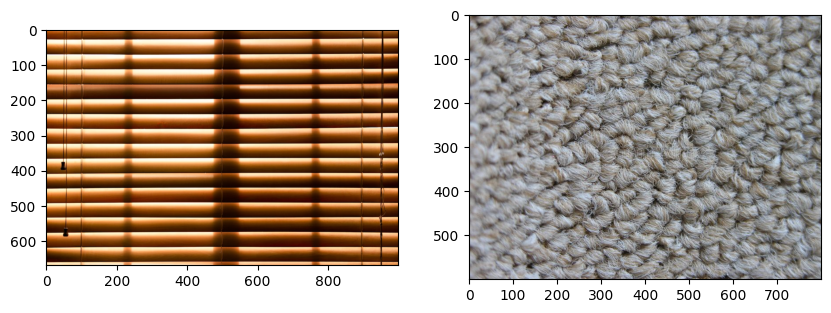

In [3]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(cv2.cvtColor(blinds_image, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(1, 2, 2)
ax.imshow(cv2.cvtColor(carpet_image, cv2.COLOR_BGR2RGB))
plt.show()

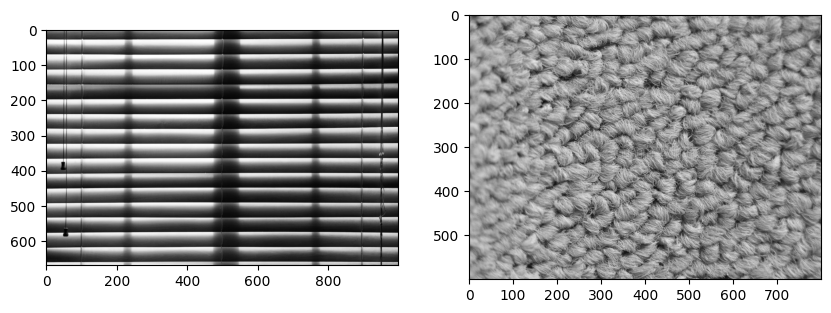

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(gray_blinds_image, cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(gray_carpet_image, cmap="gray")
plt.show()

In [5]:
images = [gray_blinds_image, gray_carpet_image]
LBP_images = []
for image in images:
    neighboor = 3
    imgLBP = np.zeros_like(image)
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            img = image[ih:ih+neighboor,iw:iw+neighboor]
            center = img[1,1]
            binary_matrix = (img >= center)*1.0
            flattened_binary = binary_matrix.T.flatten()
            img01_vector = np.delete(flattened_binary,4)

            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    LBP_images.append(imgLBP)

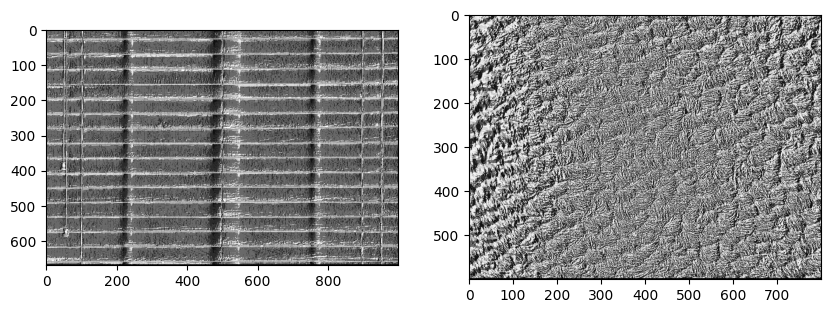

In [6]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(LBP_images[0], cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(LBP_images[1], cmap="gray")
plt.show()

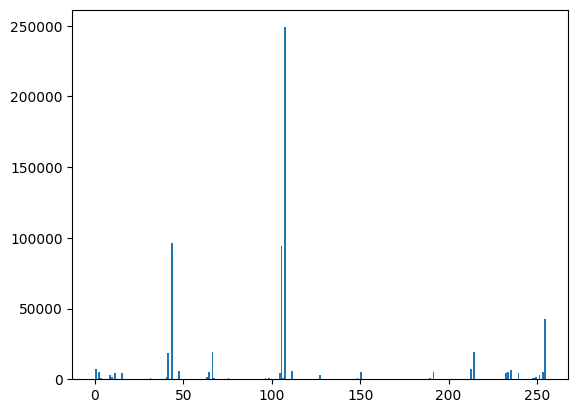

In [9]:
plt.hist(LBP_images[0].flatten(), bins=255);

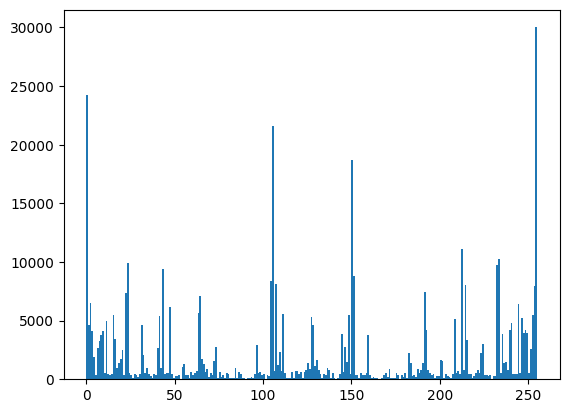

In [10]:
plt.hist(LBP_images[1].flatten(), bins=255);